# Import data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/dataset/NASDAQ100_5years.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)
df

,Date,Close/Last,Open,High,Low
0,2019-06-03,6978.02,7110.34,7126.43,6936.68
1,2019-06-04,7166.75,7056.18,7169.79,7023.09
2,2019-06-05,7220.90,7230.81,7235.23,7146.43
3,2019-06-06,7275.93,7229.86,7293.22,7201.59
4,2019-06-07,7417.29,7315.33,7445.99,7309.01
...,...,...,...,...,...
1254,2024-05-24,18808.35,18669.36,18851.99,18664.79
1255,2024-05-28,18869.44,18855.15,18875.20,18755.94
1256,2024-05-29,18736.75,18708.07,18814.82,18706.62
1257,2024-05-30,18538.66,18683.25,18705.26,18487.76


# Visualize data (SARIMAX works with single variable so I've chosen Closeing price)

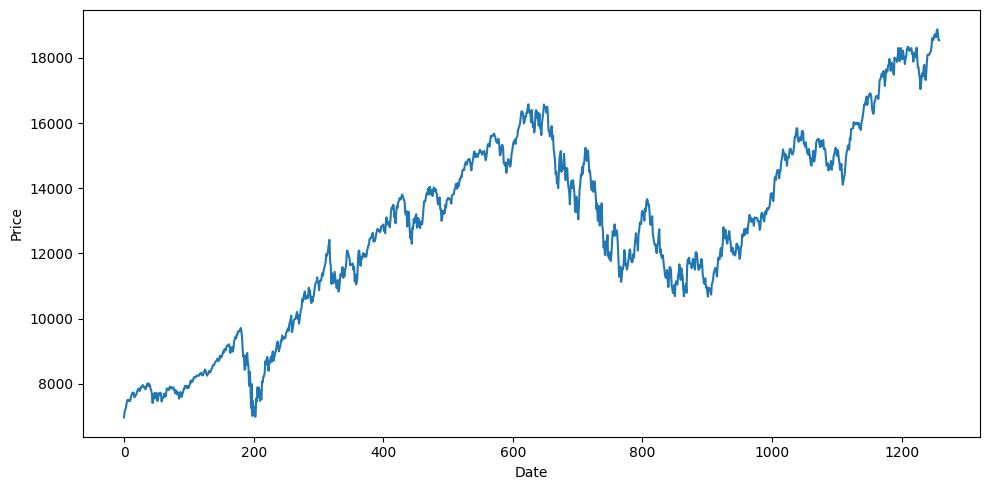

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# To use SARIMAX model the data should not be stationary, so we check this by hypothesis testing

In [ ]:
# stationary check
from statsmodels.tsa.stattools import adfuller

df_close = df[['Date','Close/Last']]

#H0: Data is not stationary <- null hypothesis
#H1: Data is stationary <- alternate hyptothesis

def check_stationary(df):
  result = adfuller(df)
  p_value = result[1]
  if result[1] <= 0.05:
    print(f"Reject H0, data is stationary, p-value: {result[1]}")
  else:
    print(f"Fail to reject H0, data is not stationary, p-value: {result[1]}")

check_stationary(df_close['Close/Last'])

Fail to reject H0, data is not stationary, p-value: 0.7779386960770316


# Also, SARIMAX is for seasonal data, so we need to check seasonality

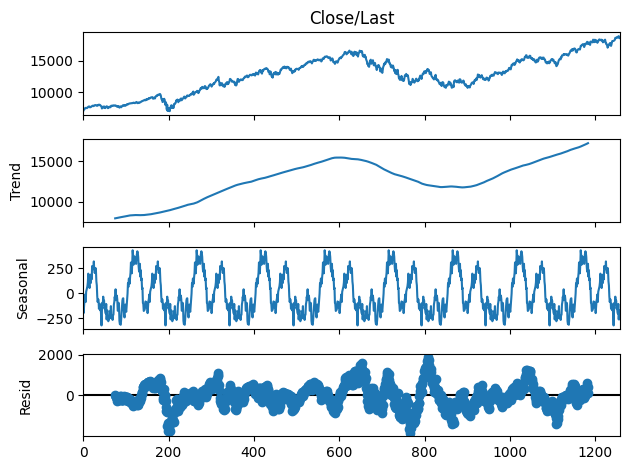

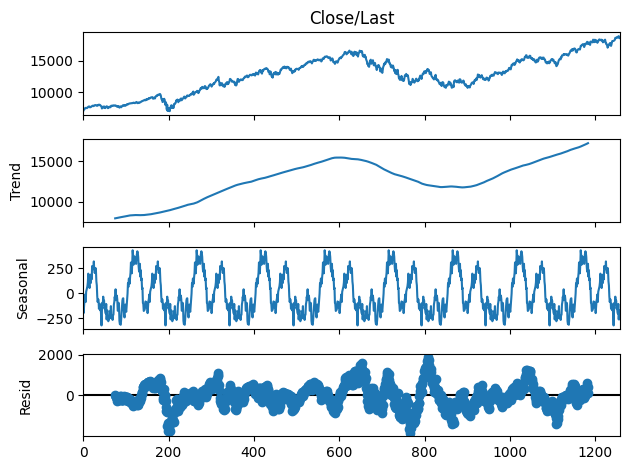

In [ ]:
# decompose data to check trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_results = seasonal_decompose(df_close['Close/Last'], model='additive',period=150)
decompose_results.plot()

# Now, creating a gridsearch algorithm to find best parameters for the SARIMAX model

In [ ]:
# Grid search for best parameters

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

best_aic = np.inf
best_pdq = None
best_s_pdq = None

temp_model = None

for param in pdq:
  for s_param in seasonal_pdq:
    print(f"Trying with pdq:{param} and s_pdq:{s_param}")

    try:
      temp_model = SARIMAX(df_close['Close/Last'], order = param, seasonal_order = s_param, enforce_stationarity = False, enforce_invertibility=False)
      results = temp_model.fit()

      if results.aic < best_aic:
        best_aic = results.aic
        best_pdq = param
        best_s_pdq = s_param
        print(f"New parameters: pdq {best_pdq}, s_pdq {best_s_pdq} with aic: {best_aic}\n")

    except:
      print("Error occured, skipping\n")
      continue

Trying with pdq:(0, 0, 0) and s_pdq:(0, 0, 0, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 0, 0, 12) with aic: 27421.44988486283

Trying with pdq:(0, 0, 0) and s_pdq:(0, 0, 1, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 0, 1, 12) with aic: 26277.678691153553

Trying with pdq:(0, 0, 0) and s_pdq:(0, 0, 2, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 0, 2, 12) with aic: 23986.490224365487

Trying with pdq:(0, 0, 0) and s_pdq:(0, 1, 0, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 1, 0, 12) with aic: 19508.82073486252

Trying with pdq:(0, 0, 0) and s_pdq:(0, 1, 1, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 1, 1, 12) with aic: 19331.56213473565

Trying with pdq:(0, 0, 0) and s_pdq:(0, 1, 2, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 1, 2, 12) with aic: 19153.269808081473

Trying with pdq:(0, 0, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 0, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 0, 0) and s_pdq:(0, 2, 2, 12)
New parameters: pdq (0, 0, 0), s_pdq (0, 2, 2, 12) with aic: 18989.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 1) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


New parameters: pdq (0, 0, 1), s_pdq (1, 2, 2, 12) with aic: 17985.86594391692

Trying with pdq:(0, 0, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 1) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(0, 0, 1) and s_pdq:(2, 2, 2, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(0, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(0, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(0, 1, 0, 12)
New parameters: pdq (0, 0, 2), s_pdq (0, 1, 0, 12) with aic: 17963.46949666874

Trying with pdq:(0, 0, 2) and s_pdq:(0, 1, 1, 12)
New parameters: pdq (0, 0, 2), s_pdq (0, 1, 1, 12) with aic: 17727.36173549996

Trying with pdq:(0, 0, 2) and s_pdq:(0, 1, 2, 12)
New parameters: pdq (0, 0, 2), s_pdq (0, 1, 2, 12) with aic: 17566.74378084069

Trying with pdq:(0, 0, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(0, 2, 2, 12)
New parameters: pdq (0, 0, 2), s_pdq (0, 2, 2, 12) with aic: 17424.4986979897

Trying with pdq:(0, 0, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(1, 2, 2, 12)
New parameters: pdq (0, 0, 2), s_pdq (1, 2, 2, 12) with aic: 17423.176712844994

Trying with pdq:(0, 0, 2) and s_pdq:(2, 0, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 0, 2) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(0, 0, 2) and s_pdq:(2, 2, 2, 12)
Trying with pdq:(0, 1, 0) and s_pdq:(0, 0, 0, 12)
New parameters: pdq (0, 1, 0), s_pdq (0, 0, 0, 12) with aic: 16754.278158040695

Trying with pdq:(0, 1, 0) and s_pdq:(0, 0, 1, 12)
New parameters: pdq (0, 1, 0), s_pdq (0, 0, 1, 12) with aic: 16606.676237860935

Trying with pdq:(0, 1, 0) and s_pdq:(0, 0, 2, 12)
New parameters: pdq (0, 1, 0), s_pdq (0, 0, 2, 12) with aic: 16459.48679601041

Trying with pdq:(0, 1, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(0, 1, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(0, 1, 0) and s_pdq:(0, 1, 2, 12)
New parameters: pdq (0, 1, 0), s_pdq (0, 1, 2, 12) with aic: 16348.398368490805

Trying with pdq:(0, 1, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 1, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 1, 0) and s_pdq:(0, 2, 2, 12)
New parameters: pdq (0, 1, 0), s_pdq (0, 2, 2, 12) with aic: 16300.6557786562

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 1, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(0, 2, 2, 12)
New parameters: pdq (0, 1, 2), s_pdq (0, 2, 2, 12) with aic: 16270.13202981721

Trying with pdq:(0, 1, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 1, 2) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 1, 2, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(0, 1, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(1, 2, 2, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(0, 2, 0) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 1) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(0, 2, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


New parameters: pdq (0, 2, 2), s_pdq (0, 2, 2, 12) with aic: 16269.530239805135

Trying with pdq:(0, 2, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(2, 1, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(0, 2, 2) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(0, 2, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(1, 2, 2, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 0) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 0) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 0, 0) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 0, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 0, 2) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 0, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 1, 2, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 1, 0) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 1) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 1) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 1, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 1, 2) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 1, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 1, 2, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 2, 0) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(1, 2, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 0, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(1, 2, 2) and s_pdq:(0, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(1, 2, 2) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(1, 0, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(1, 2, 2) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(1, 2, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(1, 2, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 0, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(1, 2, 2) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(1, 2, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 0) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(2, 0, 0) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(0, 0, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(0, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(1, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(2, 0, 1) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(0, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(1, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(1, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(2, 1, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(2, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 0, 2) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(2, 0, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 1, 2, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(2, 1, 0) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(0, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(1, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(1, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(2, 1, 1) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(2, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(0, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(0, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(1, 1, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(1, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(1, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 1, 2) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 1, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 1, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 0) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(0, 2, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 1, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 0) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 0, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 1, 2, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 2, 1, 12)
Trying with pdq:(2, 2, 0) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 0, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 0, 2, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 1, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 1, 2, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 0, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 0, 2, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 1, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 1, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(1, 2, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(2, 0, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(2, 0, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(2, 1, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(2, 1, 1, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(2, 2, 0, 12)
Trying with pdq:(2, 2, 1) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 1) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(0, 0, 0, 12)
Trying with pdq:(2, 2, 2) and s_pdq:(0, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(0, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(0, 1, 0, 12)
Trying with pdq:(2, 2, 2) and s_pdq:(0, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(0, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(0, 2, 0, 12)
Trying with pdq:(2, 2, 2) and s_pdq:(0, 2, 1, 12)
Trying with pdq:(2, 2, 2) and s_pdq:(0, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 0, 0, 12)
Trying with pdq:(2, 2, 2) and s_pdq:(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 1, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(1, 2, 1, 12)
Trying with pdq:(2, 2, 2) and s_pdq:(1, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 0, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 0, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 1, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 1, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 2, 0, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 2, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trying with pdq:(2, 2, 2) and s_pdq:(2, 2, 2, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Check the best parameters

In [ ]:
print(best_pdq, best_s_pdq, best_aic)

(0, 2, 2) (0, 2, 2, 12) 16269.530239805135


# create SARIMAX model with parameters and fit it to the data

In [ ]:
model = SARIMAX(df_close['Close/Last'], order = best_pdq, seasonal_order = best_s_pdq, enforce_stationary = False, enforce_invertibility=False)
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Close/Last   No. Observations:                 1259
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood               -8321.025
Date:                            Mon, 03 Jun 2024   AIC                          16652.049
Time:                                    11:43:00   BIC                          16677.635
Sample:                                         0   HQIC                         16661.674
                                           - 1259                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0904      0.026    -42.534      0.000      -1.141      -1.040
ma.L2          0.0848      0.024      3.497      0.000       0.037       0.132
ma.S.L12      -1.9986      0.035    -56.326      0.000      -2.068      -1.929
ma.S.L24       0.9992      0.036     28.081      0.000       0.929       1.069
sigma2      3.599e+04   1.97e-06   1.83e+10      0.000     3.6e+04     3.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                56.14
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.08
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+25. Standard errors may be unstable.
"""

# make predictions for the next 30 days and visualize it

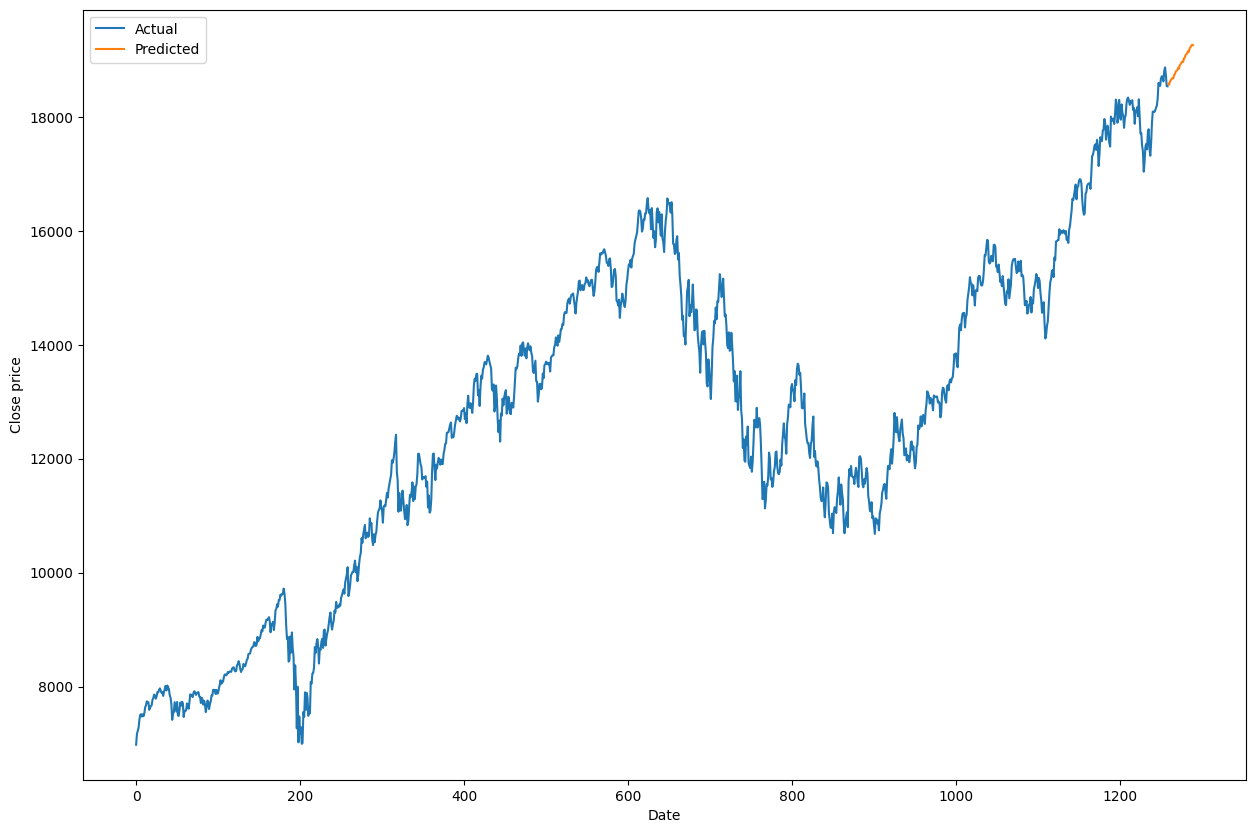

In [ ]:
predictions = model.predict(start = len(df_close['Close/Last']), end = len(df_close['Close/Last']) + 30) # 30 for next 30 days

plt.figure(figsize = (15,10))
plt.plot(df_close['Close/Last'], label = 'Actual')
plt.plot(predictions, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.show()